In [1]:
import pandas as pd
import scipy

import netpixi
import graph_tool_extras as gte

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
g = gte.load('./rede_metricas.net.gz')

In [6]:
g.add_vp('PPC')
for v in g.vertices():
    v['PPC'] = v['clustering'] * v['degree']

In [7]:
gte.save(g, 'rede_hipotese.net.gz')

In [ ]:
r = netpixi.render('rede_hipotese.net.gz', infinite=True)

In [9]:
time.sleep(5)
r.vertex_default(size=4, bwidth=1)
r.edge_default(width=1)

In [11]:
# r.vertex_scale('PPC', 10, 30)
r.vertex_scale('PRC', 10, 30)

In [12]:
PRC = []
PPC = []
for v in g.vertices():
    PRC.append(v['PRC'])
    PPC.append(v['PPC'])

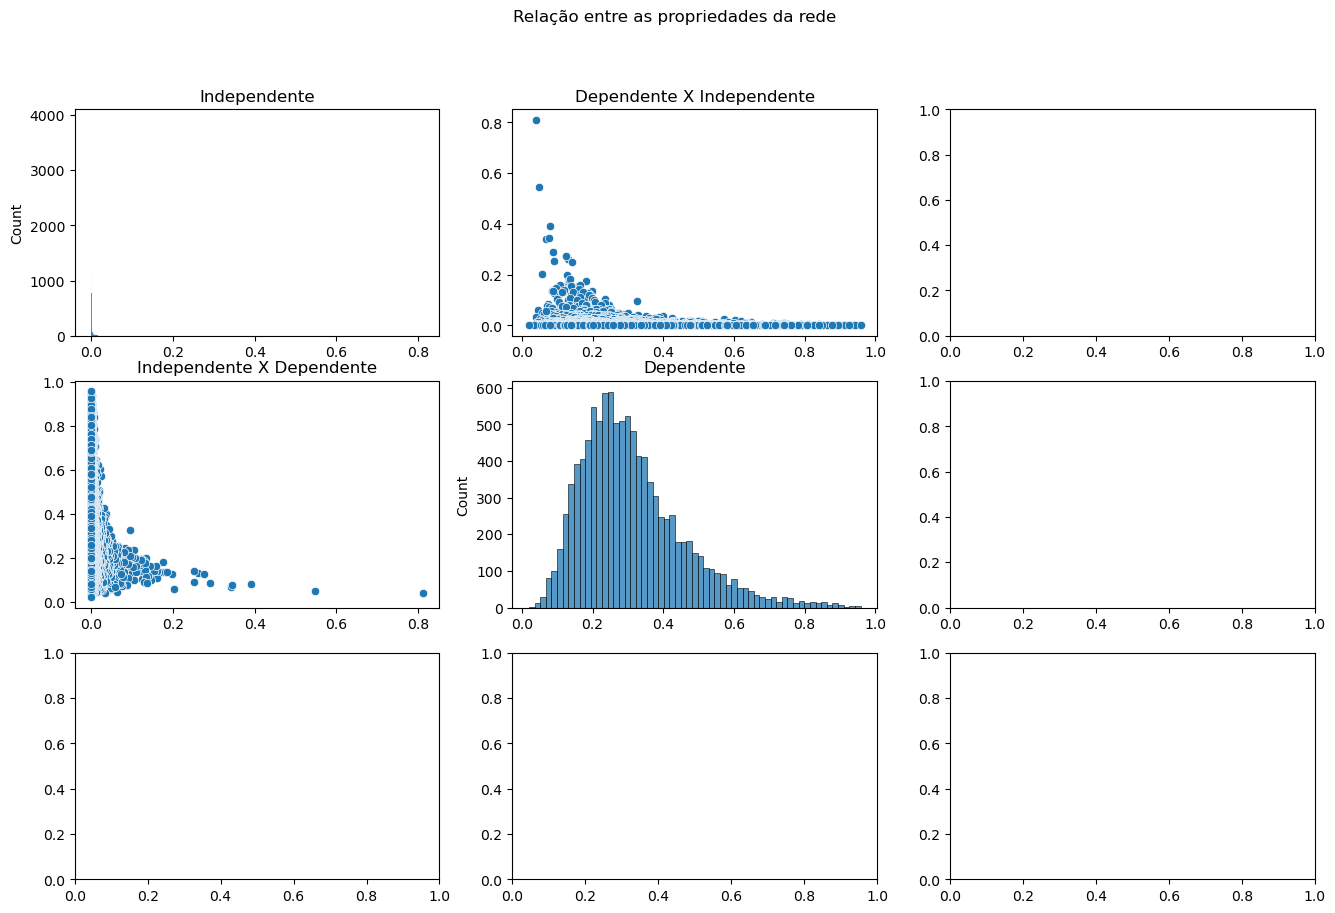

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

fig.suptitle("Relação entre as propriedades da rede")

sns.histplot(PPC, ax=axes[0, 0]).set_title("Independente")
sns.scatterplot(x=PRC, y=PPC, ax=axes[0, 1]).set_title("Dependente X Independente")
# sns.scatterplot(x=d, y=PPC, ax=axes[0, 2]).set_title("Controle X Independente")

sns.scatterplot(x=PPC, y=PRC, ax=axes[1, 0]).set_title("Independente X Dependente")
sns.histplot(PRC, ax=axes[1, 1]).set_title("Dependente")
# sns.scatterplot(x=d, y=PRC, ax=axes[1, 2]).set_title("Controle X Dependente")

# sns.scatterplot(x=PPC, y=d, ax=axes[2, 0]).set_title("Independente X Degree")
# sns.scatterplot(x=PRC, y=d, ax=axes[2, 1]).set_title("Dependente X Degree")
# sns.histplot(d, ax=axes[2, 2]).set_title("Degree")

plt.show()

In [ ]:
import os
if not os.path.isdir('img'):
    os.mkdir('img')

sns.histplot(PPC).get_figure().savefig('./img/hist_independente.png')
plt.close()
sns.scatterplot(x=PRC, y=PPC).get_figure().savefig('./img/dependente_independente.png')
plt.close()
# sns.scatterplot(x=d, y=PPC).get_figure().savefig('./img/controle_independente.png')
# plt.close()

sns.scatterplot(x=PPC, y=PRC).get_figure().savefig('./img/independente_dependente.png')
plt.close()
sns.histplot(PRC).get_figure().savefig('./img/hist_dependente.png')
plt.close()
# sns.scatterplot(x=d, y=PRC).get_figure().savefig('./img/controle_dependente.png')
# plt.close()

# sns.scatterplot(x=PPC, y=d).get_figure().savefig('./img/independente_controle.png')
# plt.close()
# sns.scatterplot(x=PRC, y=d).get_figure().savefig('./img/dependente_controle.png')
# plt.close()
# sns.histplot(d).get_figure().savefig('./img/hist_controle.png')
# plt.close()

In [16]:
def pearsonr(x, y, ndigits=10):
    statistic, p_value = scipy.stats.pearsonr(x, y)
    
    asterisk = ''
    statistic = round(statistic, ndigits)
    
    if statistic == 1: 
        asterisk = ' (óbvio)'
    elif p_value < 0.01: 
        asterisk = ' ***'
    elif p_value < 0.05: 
        asterisk = ' **'
    elif p_value < 0.1: 
        asterisk = ' *'
        
    return f'{statistic} {asterisk}'

In [17]:
data = [PPC, PRC]
result = pd.DataFrame([ [ pearsonr(j, i) for j in data ] for i in data ])
result

,0,1
0,1.0 (óbvio),-0.1534295073 ***
1,-0.1534295073 ***,1.0 (óbvio)
